In [1]:
#Demographic segmentation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [18]:
df = pd.read_csv("DataSets/Customers.csv")

In [19]:
df.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6


In [20]:
df.shape

(2000, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              2000 non-null   int64
 1   Age                     2000 non-null   int64
 2   Annual Income ($)       2000 non-null   int64
 3   Spending Score (1-100)  2000 non-null   int64
 4   Work Experience         2000 non-null   int64
 5   Family Size             2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [23]:
df.drop(['CustomerID'], axis=1,inplace=True)

In [24]:
df

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,19,15000,39,1,4
1,21,35000,81,3,3
2,20,86000,6,1,1
3,23,59000,77,0,2
4,31,38000,40,2,6
...,...,...,...,...,...
1995,71,184387,40,8,7
1996,91,73158,32,7,7
1997,87,90961,14,9,2
1998,77,182109,4,7,2


In [25]:
features = ["Age","Annual Income ($)","Spending Score (1-100)","Work Experience","Family Size"]

In [26]:
players=df.dropna(subset=features)

In [27]:
#rescale data to 1-10 to avoid higher values columns dominating 

In [32]:
players = (players - players.min())/(players.max()-players.min())*9+1

In [33]:
players.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.450909,6.245909,5.586625,3.171912,4.114562
std,2.584522,2.166906,2.514119,2.076461,2.217092
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.272727,4.532841,3.520000,1.529412,2.125000
50%,5.363636,6.213371,5.500000,2.588235,4.375000
75%,7.636364,8.063255,7.750000,4.705882,5.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [34]:
players.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,2.727273,1.710624,4.51,1.529412,4.375
1,2.909091,2.658122,8.29,2.588235,3.250
2,2.818182,5.074242,1.54,1.529412,1.000
3,3.090909,3.795119,7.93,1.000000,2.125
4,3.818182,2.800246,4.60,2.058824,6.625


In [29]:
#Initialize random centroids

In [38]:
def random_centr(players,k):
    centroids = []
    for i in range(k):
        centroid = players.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


In [39]:
centroids = random_centr(players,5)

In [40]:
centroids

,0,1,2,3,4
Age,8.454545,6.545455,8.363636,4.000000,7.636364
Annual Income ($),9.402792,7.824023,7.454452,7.397602,5.226363
Spending Score (1-100),6.040000,10.000000,4.780000,2.350000,5.500000
Work Experience,1.529412,1.529412,1.529412,1.000000,1.529412
Family Size,4.375000,2.125000,4.375000,7.750000,7.750000


In [30]:
#Label each data point

In [45]:
#applying distance formula
def labels(players,centroids):
    distances = centroids.apply(lambda x : np.sqrt(((players-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [46]:
labelsV = labels(players,centroids)

In [48]:
labelsV.value_counts()

2    586
1    499
3    407
4    343
0    165
dtype: int64

In [31]:
#Update our centroids 

In [52]:
#looking for geometric means of clusters
def upd_centroids(players, labelsV, k):
    return players.groupby(labelsV).apply(lambda x: np.exp(np.log(x).mean())).T

In [53]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [54]:
def vis_clusters (players,labelsV,centroids,iteration):
    pca = PCA(n_components = 2)
    players_2d = pca.fit_transform(players)
    centroids_2d= pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=players_2d[:,0], y=players_2d[:,1], c=labelsV)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

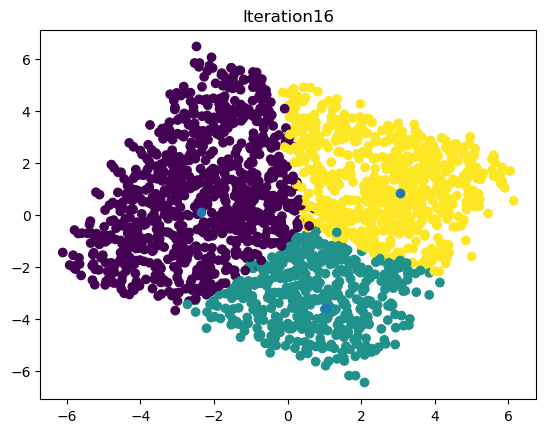

In [55]:
max_iterations = 100
k = 3

centroids = random_centr(players,k)
old_centr = pd.DataFrame()
iteration = 1

while iteration <max_iterations and not centroids.equals(old_centr):
    old_centr = centroids
    labelsV = labels(players, centroids)
    centroids = upd_centroids(players,labelsV,k)
    vis_clusters(players, labelsV, centroids,iteration)
    iteration+=1

In [56]:
centroids

,0,1,2
Age,7.700115,3.105515,3.226048
Annual Income ($),6.116519,5.455776,5.615941
Spending Score (1-100),4.651007,2.890818,7.760206
Work Experience,2.477541,2.625460,2.486719
Family Size,3.665150,3.098759,3.314806
